In [96]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [110]:
# dataDir='/dl/data/coco'
# dataType='val2017'
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile='/media/pesong/e/dl_gaussian/data/coco/cocoapi/PythonAPI/Annotations_.json'

# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...


Done (t=4.10s)
creating index...
index created!


In [125]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
slops table ladder carpet chair pack face garbage potted plant fence road_pile traffic_cone building wall pole traffic light traffic sign dustbin billboard sidewalk lane markings road pavement others sky vegetation person rider bus car motorcycle bicycle truck robot

COCO supercategories: 
nature target object construction movable object flat others roadside object road obstacles


[62]
299553


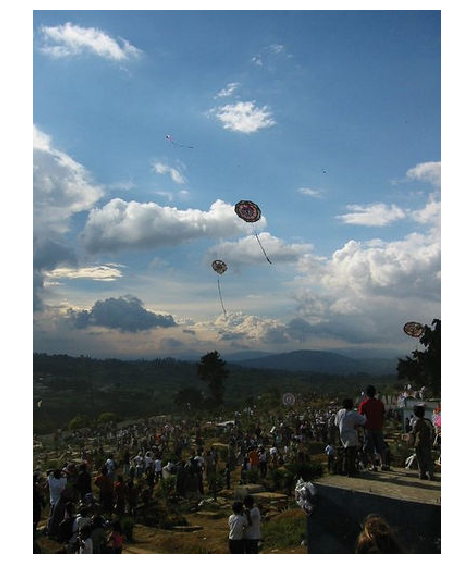

In [126]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['vegetation'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
imgIds = coco.getImgIds(imgIds = [299553])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(str(img['id']))

# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 61, 61, 62]
[[193.6, 446.01, 15.89, 53.99], [348.22, 359.81, 22.04, 72.06], [122.44, 412.68, 8.25, 10.94], [197.67, 402.44, 10.88, 21.49], [173.13, 416.01, 8.65, 25.05], [100.82, 405.17, 10.98, 22.71], [39.3, 473.0, 16.82, 27.0], [298.13, 466.58, 43.07, 32.71], [271.51, 356.54, 35.32, 71.57], [73.56, 426.29, 12.91, 36.25], [110.76, 409.82, 8.93, 24.61], [178.93, 451.79, 19.48, 48.21], [300.61, 344.42, 26.94, 79.06], [1, 0, 373, 499], [0.0, 12.0, 375.0, 311.0], [0.0, 0.0, 375.0, 215.0], [137.0, 284.0, 238.0, 166.0]]


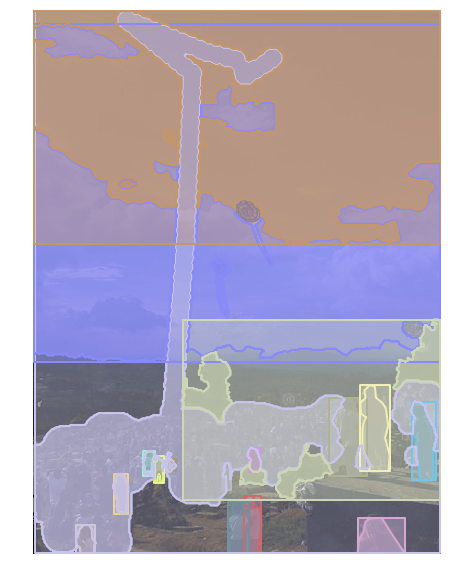

In [129]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
print([ann['category_id'] for ann in anns])
print([ann['bbox'] for ann in anns ])

coco.showAnns(anns, True)

In [65]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!


0

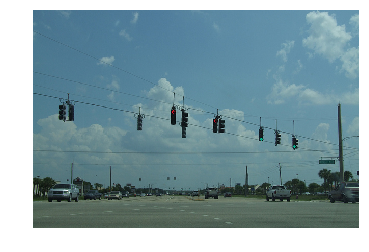

In [66]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [67]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


A large and wide street covered in lots of traffic lights.
cars are stopped at a traffic light on a highway
Traffic is stopped at a red stop light.
A traffic light and intersection with cars traveling in both directions on the street.
A number of red and green traffic lights on a wide highway.


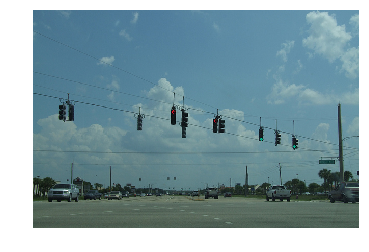

In [68]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()